In [9]:
#This data shows what the cross talk is between a cells neighbouring cell after manually lowering the intensity over the main cell.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
hep.style.use("CMS")

In [2]:
typeofrun = 'LED' 
    
maincell = 'ch1' #for LED
neighbour= 'ch2' #for LED
df = pd.read_pickle("Sept15LEDScan.pkl") #LED data

In [3]:
df.eval('%s_P2P_smooth_PE = (1/6.327) *%s_P2P_smooth'%(maincell,maincell), inplace=True)
df.eval('%s_P2P_smooth_PE = (1/6.344) *%s_P2P_smooth'%(neighbour,neighbour), inplace=True)
df.eval('time_diff = %s_time_smooth- %s_time_smooth'%(maincell,neighbour), inplace=True)
df.eval('main_amplitude = %s_P2P_smooth_PE'%(maincell), inplace=True)
df.eval('main_time = %s_time_smooth'%(maincell), inplace=True)
df.eval('neighbour_amplitude = %s_P2P_smooth_PE'%(neighbour), inplace=True)
df.eval('neighbour_time = %s_time_smooth'%(neighbour), inplace=True)

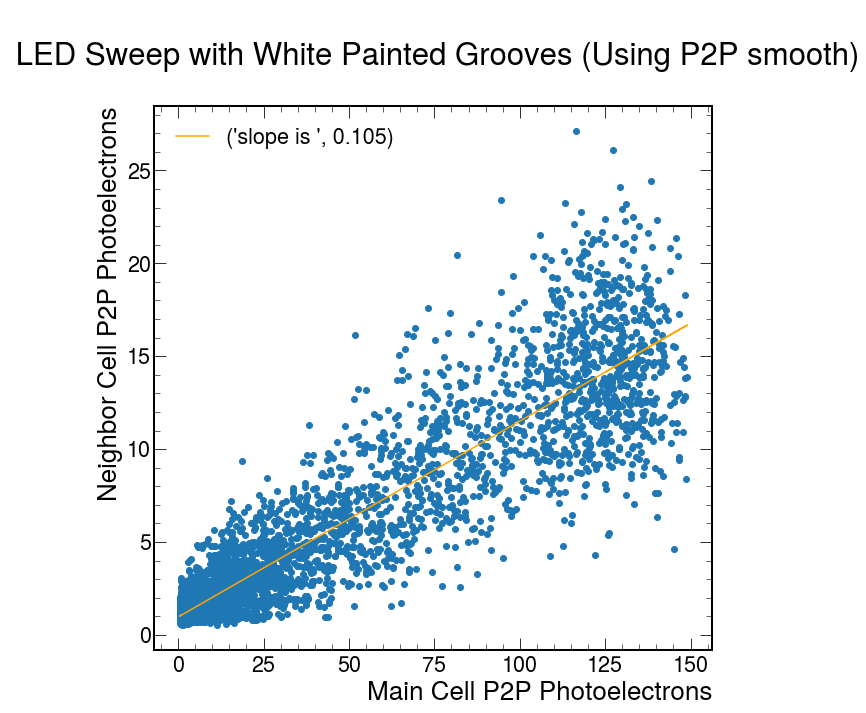

In [6]:
# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
# x axis values 

#focusing on the data below 149 Photoelectrons.
x, = [df.query('ch1_P2P_smooth_PE < 149')['ch1_P2P_smooth_PE']]
# corresponding y axis values 
y, = [df.query('ch1_P2P_smooth_PE < 149')['ch2_P2P_smooth_PE']]

# plotting the points  
plt.scatter(x, y, marker='o');

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,label = ('slope is ',round(m,3)),color ='orange')

# naming the x axis 
plt.xlabel('Main Cell P2P Photoelectrons') 
# naming the y axis 
plt.ylabel('Neighbor Cell P2P Photoelectrons') 
    
plt.title('\n LED Sweep with White Painted Grooves (Using P2P smooth)\n') 
plt.legend()

#plt.ylim(0,40)
#plt.xlim(0,200)
    
# function to show the plot 
plt.show()
#plt.savefig(LEDSweepSept15.png)

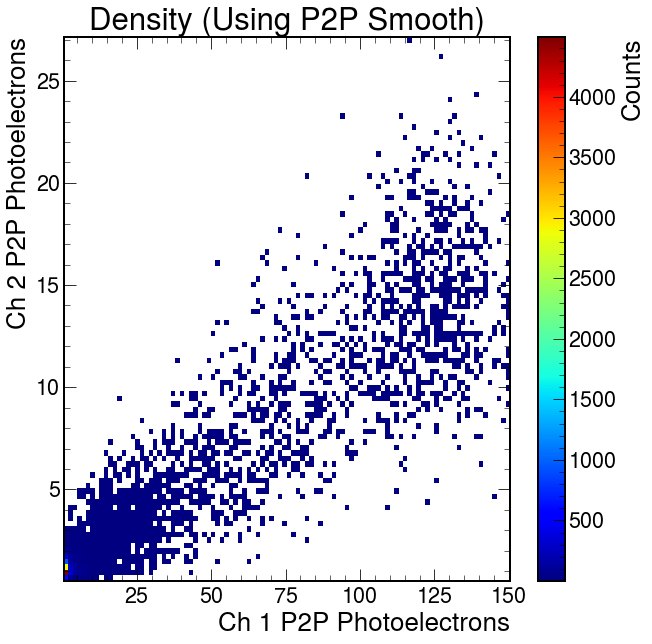

In [5]:
# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.colors import LogNorm
from pylab import *
# x axis values 
x, = [df['ch1_P2P_smooth_PE']]  
# corresponding y axis values 
y, = [df['ch2_P2P_smooth_PE']] 

plt.hist2d(x,y,bins=(100,100), cmap=plt.cm.jet,cmin=1)

colorbar(label =('Counts'))

# naming the x axis 
plt.xlabel('Ch 1 P2P Photoelectrons') 
# naming the y axis 
plt.ylabel('Ch 2 P2P Photoelectrons') 
    
plt.title('Density (Using P2P Smooth)') 

    
# function to show the plot 
plt.show() 